<a href="https://colab.research.google.com/github/DrLennon666/DAT4-students/blob/master/UCR_PLAID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gudhi
!pip install pyts
!pip install giotto-tda
!pip install persim
!pip install scikit-tda

     |████████████████████████████████| 25.2MB 176kB/s 
     |████████████████████████████████| 2.5MB 3.3MB/s 
     |████████████████████████████████| 1.5MB 2.4MB/s 
     |████████████████████████████████| 6.8MB 17.6MB/s 
     |████████████████████████████████| 14.5MB 346kB/s 
     |████████████████████████████████| 13.1MB 44.3MB/s 
     |████████████████████████████████| 399kB 40.4MB/s 
     |████████████████████████████████| 25.9MB 1.6MB/s 
     |████████████████████████████████| 3.2MB 37.5MB/s 
ERROR: tensorflow 2.3.0 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement scipy==1.4.1, but you'll have scipy 1.5.3 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.18.5
    U

  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18091 sha256=16a1ecc6e820fca1554477b8850e5905c3a9d8694bcf1911966f0a2e2f6c3541
  Stored in directory: /root/.cache/pip/wheels/2b/e1/c9/1993c7f7f114b7d3fb2d3e895e02157a7ebf554861e9e54e01
Successfully built hopcroftkarp
     |████████████████████████████████| 81kB 2.4MB/s 
     |████████████████████████████████| 102kB 5.1MB/s 
  Created wheel for ripser: filename=ripser-0.5.4-cp36-cp36m-linux_x86_64.whl size=422134 sha256=14d7fd9694e145b8d825c3f43e6bdae1194556ee3e3c395eb0c6af385e487a3f
  Stored in directory: /root/.cache/pip/wheels/b9/a1/06/bcb868233d3a612379e5d1eca67fa5e21a3c1bfc4501a921e9
Successfully built ripser


In [ ]:
import pandas as pd
import numpy as np
import gudhi
from gudhi.point_cloud.timedelay import TimeDelayEmbedding
import pyts
import sklearn
from sklearn.model_selection import train_test_split
import scipy
import matplotlib.pyplot as plt
# Giotto
import gtda as gt
import gtda.diagrams as diag
import gtda.homology as hl
from gtda.time_series import SlidingWindow
from gtda.time_series import TakensEmbedding

#sci-kit TDA
from ripser import Rips
from persim import PersImage

In [ ]:
# The password is the missing words from this sentence “Why would *******
# use the archive and not acknowledge it?

# Why would someone use the archive and not acknowledge it?



In [ ]:
!wget https://www.cs.ucr.edu/~eamonn/time_series_data_2018/UCRArchive_2018.zip

--2020-10-27 00:24:00--  https://www.cs.ucr.edu/~eamonn/time_series_data_2018/UCRArchive_2018.zip
Resolving www.cs.ucr.edu (www.cs.ucr.edu)... 169.235.30.15
Connecting to www.cs.ucr.edu (www.cs.ucr.edu)|169.235.30.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 316175400 (302M) [application/zip]
Saving to: ‘UCRArchive_2018.zip’

UCRArchive_2018.zip 100%[===================>] 301.53M  52.6MB/s    in 6.1s    

2020-10-27 00:24:06 (49.1 MB/s) - ‘UCRArchive_2018.zip’ saved [316175400/316175400]



In [ ]:
# The password is the missing words from this sentence “Why would *******
# use the archive and not acknowledge it?

# Why would someone use the archive and not acknowledge it?

!unzip -P someone UCRArchive_2018.zip 

Archive:  UCRArchive_2018.zip
   creating: UCRArchive_2018/
   creating: UCRArchive_2018/MixedShapesSmallTrain/
  inflating: UCRArchive_2018/MixedShapesSmallTrain/README.md  
  inflating: UCRArchive_2018/MixedShapesSmallTrain/MixedShapesSmallTrain_TEST.tsv  
  inflating: UCRArchive_2018/MixedShapesSmallTrain/MixedShapesSmallTrain_TRAIN.tsv  
   creating: UCRArchive_2018/Beef/
  inflating: UCRArchive_2018/Beef/README.md  
  inflating: UCRArchive_2018/Beef/Beef_TRAIN.tsv  
  inflating: UCRArchive_2018/Beef/Beef_TEST.tsv  
   creating: UCRArchive_2018/ShapesAll/
  inflating: UCRArchive_2018/ShapesAll/README.md  
  inflating: UCRArchive_2018/ShapesAll/ShapesAll_TEST.tsv  
  inflating: UCRArchive_2018/ShapesAll/ShapesAll_TRAIN.tsv  
   creating: UCRArchive_2018/RefrigerationDevices/
  inflating: UCRArchive_2018/RefrigerationDevices/RefrigerationDevices_TEST.tsv  
  inflating: UCRArchive_2018/RefrigerationDevices/README.md  
  inflating: UCRArchive_2018/RefrigerationDevices/RefrigerationDevi

In [ ]:
from sklearn import preprocessing


In [ ]:
# PLAID data
sr =  30_000 # sample rate
train_df = pd.read_csv('./UCRArchive_2018/PLAID/PLAID_TRAIN.tsv', 
                       sep='\t', header=None)
labels = train_df.iloc[:,0]
#labels = labels.fillna(value=0)
ts = train_df.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(ts, labels, 
                                   test_size=0.33, random_state=13)

In [ ]:
le = preprocessing.LabelEncoder()
le.fit_transform(y_test)
le.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
def remove_inf(persist_interval):
  mask = ~np.isinf(persist_interval[:,1])
  return persist_interval[mask]

def top_lifetime(h_n, n=1):
  '''
  Calculte top n lifetimes of n-dimension homology group.
  '''
  _ = remove_inf(h_n)
  temp = _[:,1] - _[:,0]
  temp = np.sort(temp)[::-1]

  if n>1:
   return temp[0:n]
  elif n==1:
    return temp.max()

def avg_lifetime(h_n):
  '''
  Calculte mean lifetime of n-dimension homology group.
  '''
  _ = remove_inf(h_n)
  return np.mean(_[:,1] - _[:,0])

def num_points(h_n):
  '''
  Calculte the number of points in each dimension.
  '''
  _ = remove_inf(h_n)
  return _.shape[0]

def sum_lifetime(h_n):
  _ = remove_inf(h_n)
  return sum(_[:,1] - _[:,0])

def relevant_holes(h_n, theta=0.5):
  _ = remove_inf(h_n)
  temp = _[:,1] - _[:,0]
  threshold = temp.max()*theta
  rel_idx = np.where(temp>threshold)
  rel_holes = temp[rel_idx]
  return rel_holes.shape[0]

#d=3
#tau=4
#ts_max = X_train.iloc[idx].dropna()[0:].max()

#embedding = TimeDelayEmbedding(dim=d, delay=tau)(X_train.iloc[idx].dropna()[0:]/ts_max)

#rips_complex = gudhi.RipsComplex(embedding, max_edge_length=np.sqrt(2), sparse=2)
#simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
#simplex_tree.compute_persistence()

#H0 = simplex_tree.persistence_intervals_in_dimension(0)
#H1 = simplex_tree.persistence_intervals_in_dimension(1)
#betti_num = simplex_tree.betti_numbers()

def prepare_features(ts_df, d=3, tau=4, theta=0.5):
  avg_lifetime_0 = []
  avg_lifetime_1 = []
  betti_0 = []
  betti_1 = []
  num_points_0 = []
  num_points_1 = []
  sum_lifetime_0 = []
  sum_lifetime_1 = []
  rel_holes_0 = []
  rel_holes_1 = []
  top_lifetime_0 = []
  top_lifetime_1 = []

  for idx in range(ts_df.shape[0]):
    # embed and normalize
    ts_max = ts_df.iloc[idx].dropna()[0:].max()
    embedding = TimeDelayEmbedding(dim=d, delay=tau)(ts_df.iloc[idx].dropna()/ts_max)

    # Compute persistence for 0 and 1-d homologies. Max filtration 
    # radius sqrt 2
    rips_complex = gudhi.RipsComplex(embedding, max_edge_length=np.sqrt(2), sparse=2)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    simplex_tree.compute_persistence()

    # Persistent homologies and Betti numbers
    H0 = simplex_tree.persistence_intervals_in_dimension(0)
    H1 = simplex_tree.persistence_intervals_in_dimension(1)
    betti_num = simplex_tree.betti_numbers()

    # Generate features
    avg_lifetime_0.append(avg_lifetime(H0))
    avg_lifetime_1.append(avg_lifetime(H1))
    betti_0.append(betti_num[0])
    betti_1.append(betti_num[1])
    num_points_0.append(num_points(H0))
    num_points_1.append(num_points(H1))
    sum_lifetime_0.append(sum_lifetime(H0))
    sum_lifetime_1.append(sum_lifetime(H1))
    rel_holes_0.append(relevant_holes(H0, theta=theta))
    rel_holes_1.append(relevant_holes(H1, theta=theta))
    top_lifetime_0.append(top_lifetime(H0))
    top_lifetime_1.append(top_lifetime(H1))
  
  data_dict = {'avg_lifetime_0':avg_lifetime_0, 
               'avg_lifetime_1':avg_lifetime_1,
               'betti_0':betti_0, 'betti_1':betti_1, 
               'num_points_0':num_points_0,
               'num_points_1':num_points_1,
               'sum_lifetime_0':sum_lifetime_0,
               'sum_lifetime_1':sum_lifetime_1,
               'rel_holes_0':rel_holes_0,
               'rel_holes_1':rel_holes_1,
               'top_lifetime_0':top_lifetime_0,
               'top_lifetime_1':top_lifetime_1}
  df = pd.DataFrame(data=data_dict)
  return df

#top_lifetime(H0)
#sum_lifetime(H1)
#relevant_holes(H0, theta=0.5)

In [ ]:
tda_df_train = prepare_features(X_train[0:], d=3, tau=4, theta=0.5)
tda_df_test = prepare_features(X_test[0:], d=3, tau=4, theta=0.5)

In [ ]:
tda_df_train.describe()

,avg_lifetime_0,avg_lifetime_1,betti_0,betti_1,num_points_0,num_points_1,sum_lifetime_0,sum_lifetime_1,rel_holes_0,rel_holes_1,top_lifetime_0,top_lifetime_1
count,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000
mean,0.026313,0.028731,1.013928,0.038997,314.334262,43.125348,7.251035,1.104731,6.203343,2.448468,0.693391,0.218663
std,0.013834,0.029236,0.117354,0.244801,153.135861,48.577570,3.418092,1.911929,5.913755,2.585303,0.267236,0.162175
min,0.004791,0.000098,1.000000,0.000000,91.000000,1.000000,1.489223,0.000098,1.000000,1.000000,0.022880,0.000098
25%,0.017136,0.007061,1.000000,0.000000,191.000000,14.000000,5.155663,0.149403,3.000000,1.000000,0.530608,0.098640
50%,0.023688,0.018896,1.000000,0.000000,281.000000,28.000000,6.503283,0.444259,4.000000,2.000000,0.683517,0.183328
75%,0.029964,0.041781,1.000000,0.000000,423.000000,57.000000,8.462542,1.322494,7.000000,3.000000,0.900141,0.305725
max,0.094065,0.167721,2.000000,3.000000,1335.000000,422.000000,39.550324,21.335356,47.000000,24.000000,1.405904,1.028980


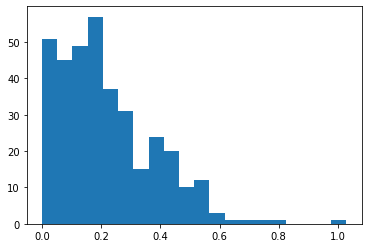

In [ ]:
plt.hist(tda_df_train.top_lifetime_1, bins=20)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
le = preprocessing.LabelEncoder()
yt = le.fit_transform(y_train)
ytt = le.transform(y_test)

clf = RandomForestClassifier(max_depth=12, random_state=0)
clf.fit(tda_df_train, yt)
y_pred = clf.predict(tda_df_test)
#y_test
accuracy_score(ytt, y_pred)

0.601123595505618

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

X_train_standard = StandardScaler().fit_transform(tda_df_train)
X_test_standard = StandardScaler().fit(tda_df_test)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin

km = KMeans(n_clusters=10)
km.fit(X_train_standard)
km.labels_
#pairwise_distances_argmin(X_train_standard, km.cluster_centers_)
#y_train

array([6, 3, 2, 0, 0, 7, 7, 0, 6, 0, 7, 7, 6, 0, 7, 2, 6, 7, 0, 3, 1, 3,
       7, 7, 1, 6, 7, 0, 7, 1, 6, 8, 0, 0, 7, 0, 3, 6, 7, 0, 8, 7, 1, 6,
       7, 6, 0, 7, 1, 1, 1, 0, 8, 6, 6, 0, 6, 4, 0, 7, 0, 7, 1, 7, 7, 1,
       7, 0, 4, 7, 0, 8, 8, 6, 1, 7, 7, 1, 1, 6, 5, 6, 6, 0, 0, 8, 7, 2,
       2, 5, 7, 9, 6, 7, 8, 8, 1, 0, 6, 7, 0, 0, 0, 7, 7, 0, 3, 1, 5, 1,
       6, 0, 1, 8, 7, 0, 0, 7, 5, 6, 0, 6, 7, 8, 1, 6, 7, 8, 6, 7, 8, 7,
       8, 7, 0, 6, 6, 1, 8, 6, 7, 1, 8, 7, 7, 0, 7, 0, 4, 6, 3, 0, 7, 0,
       6, 4, 7, 0, 6, 6, 0, 7, 7, 1, 7, 6, 7, 6, 7, 0, 6, 0, 7, 7, 8, 8,
       0, 1, 8, 7, 7, 6, 7, 6, 6, 1, 6, 1, 7, 6, 7, 4, 1, 0, 7, 2, 7, 7,
       7, 6, 3, 8, 1, 7, 6, 7, 0, 1, 7, 1, 6, 1, 0, 7, 0, 7, 8, 0, 6, 7,
       6, 2, 0, 0, 7, 7, 6, 0, 7, 8, 8, 7, 8, 7, 7, 7, 7, 7, 0, 1, 7, 6,
       7, 7, 1, 7, 1, 8, 0, 7, 1, 4, 8, 7, 1, 6, 1, 0, 7, 7, 7, 1, 8, 0,
       1, 7, 8, 7, 7, 1, 6, 6, 1, 7, 7, 4, 2, 7, 8, 1, 1, 6, 6, 1, 2, 6,
       1, 0, 7, 4, 8, 7, 7, 6, 8, 1, 8, 6, 7, 7, 6,

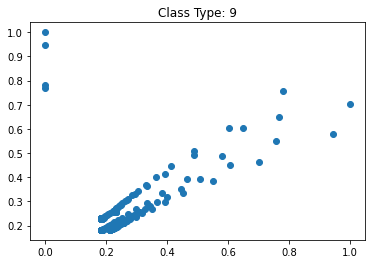

In [ ]:
d=3
tau=4

embedding = TimeDelayEmbedding(dim=d, delay=tau)(X_train.iloc[idx].dropna()[0:]/ts_max)
plt.scatter(embedding[:,0], embedding[:,1])
plt.title('Class Type: {}'.format( y_train.iloc[idx]))
plt.show()

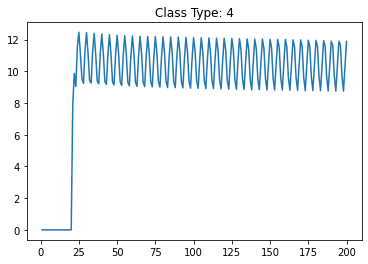

In [ ]:
idx = 55#250
ts_max = X_train.iloc[idx].dropna()[0:].max()
plt.plot(X_train.iloc[idx].dropna()[0:])#/ts_max)
plt.title('Class Type: {}'.format( y_train.iloc[idx]))
plt.show()

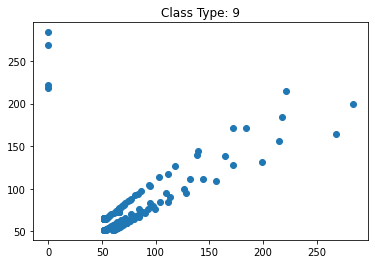

In [ ]:
d=3
tau=4

embedding = TimeDelayEmbedding(dim=d, delay=tau)(X_train.iloc[idx].dropna()[0:])
plt.scatter(embedding[:,0], embedding[:,1])
plt.title('Class Type: {}'.format( y_train.iloc[idx]))
plt.show()

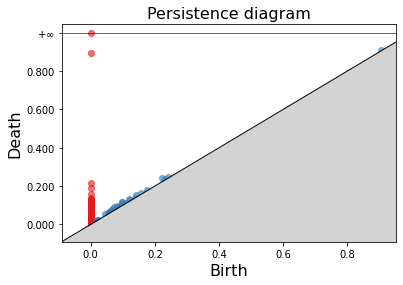

In [ ]:
rips_complex = gudhi.RipsComplex(embedding, max_edge_length=np.sqrt(2), sparse=1)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)
persist = simplex_tree.persistence() #barcode list
gudhi.plot_persistence_diagram(persist)

In [ ]:
test = simplex_tree.persistence_intervals_in_dimension(1)

def remove_inf(persist_interval):
  mask = ~np.isinf(persist_interval[:,1])
  return persist_interval[mask]

test = remove_inf(test)

In [ ]:
test[:,1]-test[:,0]

test[:,1].max()

n_steps = 500
maxr = 0.5
radii = np.linspace(0, maxr, n_steps)
betti_list = []

sum(test[:,1]>=radii[0])

31

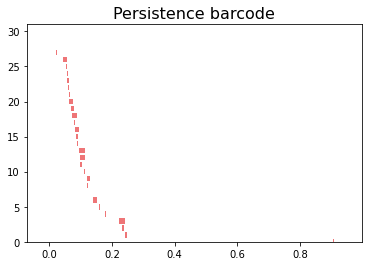

In [ ]:
gudhi.plot_persistence_barcode(simplex_tree.persistence_intervals_in_dimension(1)) 
#gudhi.plot_persistence_barcode(test)
plt.show()

In [ ]:
#gudhi.representations.vector_methods.Landscape(num_landscapes=5, resolution=100, sample_range=[nan, nan])

from gudhi.representations.vector_methods import Landscape


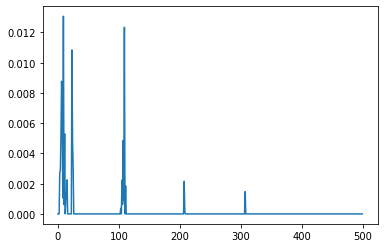

In [ ]:
ls = Landscape(num_landscapes=5)
mask = np.where(simplex_tree.persistence_intervals_in_dimension(1)[:,1]!=np.inf)
ls.fit([simplex_tree.persistence_intervals_in_dimension(1)[mask]])
pers_land=ls.transform([simplex_tree.persistence_intervals_in_dimension(1)[mask]])
plt.plot(pers_land.reshape(-1))


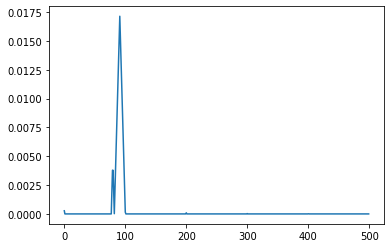

In [ ]:

plt.plot(pers_land.reshape(-1))


In [ ]:
alpha_complex = gudhi.AlphaComplex(points=embedding)
simplex_tree_alpha = alpha_complex.create_simplex_tree(max_alpha_square=.3)
diag_alpha = simplex_tree_alpha.persistence()

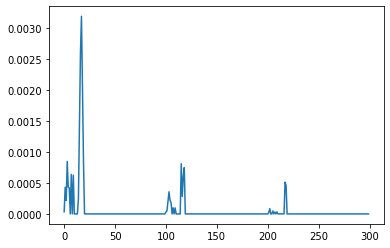

In [ ]:
ls = Landscape(num_landscapes=3, resolution=100)
mask = np.where(simplex_tree_alpha.persistence_intervals_in_dimension(1)[:,1]!=np.inf)
ls.fit([simplex_tree_alpha.persistence_intervals_in_dimension(1)[mask]])
pers_land=ls.transform([simplex_tree_alpha.persistence_intervals_in_dimension(1)[mask]])
plt.plot(pers_land.reshape(-1))


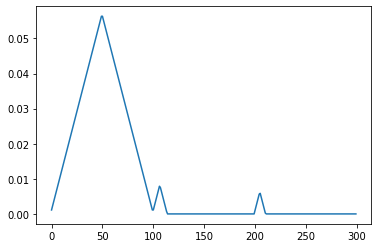

In [ ]:
mask = np.where(simplex_tree_alpha.persistence_intervals_in_dimension(0)[:,1]!=np.inf)
ls.fit([simplex_tree_alpha.persistence_intervals_in_dimension(0)[mask]])
pers_land=ls.transform([simplex_tree_alpha.persistence_intervals_in_dimension(0)[mask]])
plt.plot(pers_land.reshape(-1))

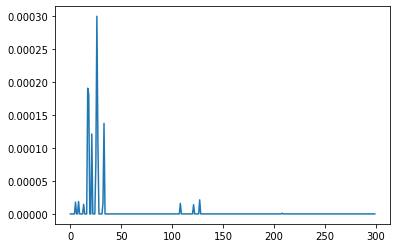

In [ ]:
mask = np.where(simplex_tree_alpha.persistence_intervals_in_dimension(2)[:,1]!=np.inf)
ls.fit([simplex_tree_alpha.persistence_intervals_in_dimension(2)[mask]])
pers_land=ls.transform([simplex_tree_alpha.persistence_intervals_in_dimension(2)[mask]])
plt.plot(pers_land.reshape(-1))

Giotto


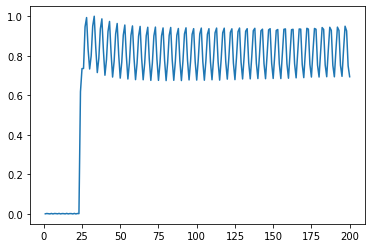

200


In [ ]:
idx = 200
ts_max = ts.iloc[idx].dropna().max()
norm_ts = ts.iloc[idx].dropna()/ts_max
plt.plot(norm_ts)
plt.show()
print(norm_ts.size)

In [ ]:
y = np.linspace(0, norm_ts.size/sr, norm_ts.size)

In [ ]:
window_size = 5
stride = 2

SW = SlidingWindow(width=window_size, stride=stride)
X_sw, yr = SW.fit_transform_resample(norm_ts, y)
#X_sw, yr

TypeError: ignored

In [ ]:
time_delay = 4
dimension = 3

TE = TakensEmbedding(time_delay=time_delay, dimension=dimension)
X_te = TE.fit_transform(X_train.iloc[idx].dropna())

NameError: ignored

In [ ]:
X_te.shape

In [ ]:
#plt.scatter(X_te[:,0], X_te[:,1])

In [ ]:
from gtda.homology import VietorisRipsPersistence

# 0 - connected components, 1 - loops, 2 - voids
#homology_dimensions = [0, 1]

#periodic_persistence = VietorisRipsPersistence(
#    homology_dimensions=homology_dimensions, n_jobs=6
#)
#print("Persistence diagram for periodic signal")
#periodic_persistence.fit_transform_plot([X_te])


In [ ]:
embedder = TakensEmbedding(parameters_type='search', dimension=d,
                                  time_delay=4, n_jobs=-1)
embedder.fit(X_train[idx].dropna())
embedder_time_delay = embedder.time_delay_
embedder_dimension = embedder.dimension_

print('Optimal embedding time delay based on mutual information: ', embedder_time_delay)
print('Optimal embedding dimension based on false nearest neighbors: ', embedder_dimension)

X_te = embedder.fit_transform(X_train.iloc[idx].dropna())

# 0 - connected components, 1 - loops, 2 - voids
homology_dimensions = [0, 1]

persistence_diagram = VietorisRipsPersistence(
    homology_dimensions=homology_dimensions, n_jobs=-1)

X_diagrams = persistence_diagram.fit_transform([X_te])
diagram_scaler = diag.Scaler()
diagram_scaler.fit(X_diagrams)
X_scaled = diagram_scaler.transform(X_diagrams)

persistent_entropy = diag.PersistenceEntropy()
X_persistent_entropy = persistent_entropy.fit_transform(X_scaled)

betti_curves = diag.BettiCurve(n_bins=500)
betti_curves.fit(X_scaled)
X_betti_curves = betti_curves.transform(X_scaled)

df_betti_list = []
for i in homology_dimensions:
  df_betti_list.append(pd.DataFrame(X_betti_curves[:, i, :]))

 # if return_betti_surface==True:
  #    return (X_scaled, df_betti_list, X_betti_curves)
   # else:
    #    return (X_scaled, df_betti_list

NameError: ignored

In [ ]:
def num_relevant_holes(X_scaled, homology_dim, theta=0.7):
    """
    INPUT:
        X_scaled: scaled persistence diagrams, numpy array
        homology_dim: dimension of the homology to consider, integer
        theta: value between 0 and 1 to be used to calculate the threshold, float
    OUTPUT:
        n_rel_holes: list of the number of relevant holes in each time window
    """

    n_rel_holes = []

    for i in range(X_scaled.shape[0]):
        persistence_table = pd.DataFrame(X_scaled[i], columns=['birth', 'death', 'homology'])
        persistence_table['lifetime'] = persistence_table['death'] - persistence_table['birth']
        threshold = persistence_table[persistence_table['homology'] == homology_dim]['lifetime'].max() * theta
        n_rel_holes.append(persistence_table[(persistence_table['lifetime'] > threshold)
                                             & (persistence_table['homology'] == homology_dim)].shape[0])
    return n_rel_holes

num_relevant_holes(X_scaled, 1, theta=0.7)

array([195,  96,  36,  22,  22,  21,  19,  19,  18,  17,  16,  15,  15,
        15,  15,  15,  15,  15,  15,  15,  15,  15,  15,  15,  15,  15,
        14,  14,  14,  14,  13,  13,  13,  13,  13,  13,  13,  13,  13,
        13,  13,  13,  12,  11,  10,   9,   9,   9,   9,   9,   9,   9,
         9,   9,   9,   9,   9,   9,   9,   9,   9,   9,   9,   9,   9,
         9,   9,   9,   9,   9,   9,   8,   8,   8,   8,   8,   8,   8,
         8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,
         8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,
         8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,
         8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,
         8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,
         8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,
         8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,
         8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   

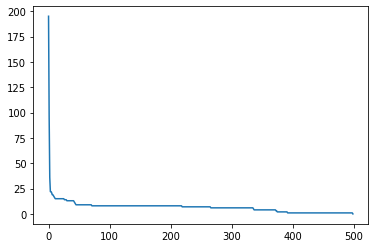

In [ ]:
plt.plot(X_betti_curves[0][0])

X_te.shape

X_betti_curves[0][0]


Data preparation

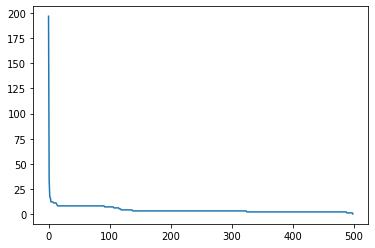

In [ ]:
# PLAID data
sr =  30_000 # sample rate
train_df = pd.read_csv('./UCRArchive_2018/PLAID/PLAID_TRAIN.tsv', 
                       sep='\t', header=None)
labels = train_df.iloc[:,0]
ts = train_df.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(ts, labels, 
                                   test_size=0.33, random_state=13)

# not using search, fixing d and tau
# Define embedding dimension and delay factor
d = 3
tau =1 
embedder = TakensEmbedding(parameters_type='fixed', dimension=d,
                                  time_delay=1, n_jobs=-1)
idx=39
embedder.fit(X_train[idx].dropna())
X_te = embedder.fit_transform(X_train.iloc[idx].dropna())


# Look at 0-dimension connected components and 1-d loops
homology_dimensions = [0, 1]

persistence_diagram = VietorisRipsPersistence(
    homology_dimensions=homology_dimensions, n_jobs=-1)

X_diagrams = persistence_diagram.fit_transform([X_te])
diagram_scaler = diag.Scaler()
diagram_scaler.fit(X_diagrams)
X_scaled = diagram_scaler.transform(X_diagrams)

#persistent_entropy = diag.PersistenceEntropy()
#X_persistent_entropy = persistent_entropy.fit_transform(X_scaled)

# Calculate Betti curves for each homology dimension
betti_curves = diag.BettiCurve(n_bins=500)
betti_curves.fit(X_scaled)
X_betti_curves = betti_curves.transform(X_scaled)

X_betti_curves.shape # batch, channels, time
plt.plot(X_betti_curves[0][0])

# for every sample create this 0 and 1 d betti surface

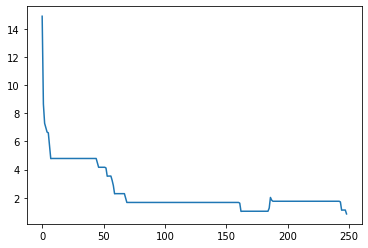

In [ ]:
import torch
from torch import nn
import torchvision

m = nn.Conv1d(2,10,4,stride=2)
output = m(torch.tensor(X_betti_curves[0]).unsqueeze(0).float())

plt.plot(output[0,2,:].detach().numpy())

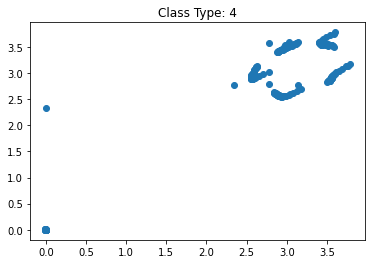

In [ ]:
plt.scatter(X_te[:,0], X_te[:,1])
plt.title('Class Type: {}'.format( y_train.iloc[idx]))
plt.show()

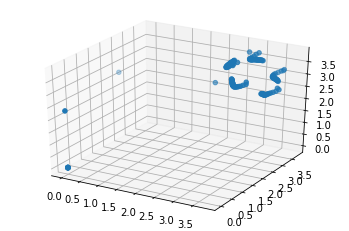

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_te[:,0], X_te[:,1], X_te[:,2])


In [ ]:
ef tda_diagrams(path,
                 embedding_time_delay,
                 embedding_dimension,
                 window_width,
                 window_stride,
                 homology_dim=2,
                 return_betti_surface=False):
    """
    INPUT:
        path: int (number to OpenML dataset)
        embedder_time_delay: int
        embedding_dimension: int
        window_width: int
        window_stride: int
        homology_dim: int
        return_betti_surface: boolean
    OUTPUT:
        X_scaled: persistence diagrams
        df_betti_list: List of Betti curve DataFrames
    """

    df = get_dataset(path)
    df = df.get_data()[0]
    df.rename({'label': 'y', 'coord_0': 'x'}, axis='columns', inplace=True)
    df['idx'] = np.arange(len(df))

    embedder = ts.TakensEmbedding(parameters_type='search', dimension=embedding_dimension,
                                  time_delay=embedding_time_delay, n_jobs=-1)
    embedder.fit(df['x'])
    embedder_time_delay = embedder.time_delay_
    embedder_dimension = embedder.dimension_

    print('Optimal embedding time delay based on mutual information: ', embedder_time_delay)
    print('Optimal embedding dimension based on false nearest neighbors: ', embedder_dimension)

    X_embedded, y_embedded = embedder.transform_resample(df['x'], df['y'])
    sliding_window = ts.SlidingWindow(width=window_width, stride=window_stride)
    sliding_window.fit(X_embedded, y_embedded)

    X_windows, y_windows = sliding_window.transform_resample(X_embedded, y_embedded)

    homology_dimensions = [0, 1, 2]
    persistenceDiagram = hl.VietorisRipsPersistence(metric='euclidean', max_edge_length=10,
                                                    homology_dimensions=homology_dimensions, n_jobs=-1)

    X_diagrams = persistenceDiagram.fit_transform(X_windows[:])
    diagram_scaler = diag.Scaler()
    diagram_scaler.fit(X_diagrams)
    X_scaled = diagram_scaler.transform(X_diagrams)

    persistent_entropy = diag.PersistenceEntropy()
    X_persistent_entropy = persistent_entropy.fit_transform(X_scaled)

    betti_curves = diag.BettiCurve()
    betti_curves.fit(X_scaled)
    X_betti_curves = betti_curves.transform(X_scaled)

    df_betti_list = []
    for i in homology_dimensions:
        df_betti_list.append(pd.DataFrame(X_betti_curves[:, i, :]))

    if return_betti_surface==True:
        return (X_scaled, df_betti_list, X_betti_curves)
    else:
        return (X_scaled, df_betti_list

In [ ]:
"""Plot functions """

import numpy as np
import plotly.graph_objs as gobj
from gtda.diagrams._utils import _subdiagrams


def plot_point_cloud(point_cloud, dimension=None):
    """Plot the first 2 or 3 coordinates of the point cloud.
     This function will not work on 1-dimensional arrays.
    Parameters
    ----------
    point_cloud : ndarray, shape (n_samples, n_dimensions)
        Data points to be represented in a 2D or 3D scatter plot. Only the
        first 2 or 3 dimensions will be considered for plotting.
    dimension : int or None, default : ``None``
        This parameter sets the dimension of the resulting plot. If ``None``,
        the dimension will be chosen between 2 and 3 depending on
        ``n_dimensions`` see Input).
    """
    if dimension is None:
        dimension = np.min((3, point_cloud.shape[1]))

    # Check consistency between point_cloud and dimension
    if point_cloud.shape[1] < dimension:
        raise ValueError("Not enough dimensions available in the input point"
                         "cloud.")

    if dimension == 2:
        layout = {
            "title": "Point Cloud",
            "width": 800,
            "height": 800,
            "xaxis1": {
                "title": "First coordinate",
                "side": "bottom",
                "type": "linear",
                "ticks": "outside",
                "anchor": "x1",
                "showline": True,
                "zeroline": True,
                "showexponent": "all",
                "exponentformat": "e"
            },
            "yaxis1": {
                "title": "Second coordinate",
                "side": "left",
                "type": "linear",
                "ticks": "outside",
                "anchor": "y1",
                "showline": True,
                "zeroline": True,
                "showexponent": "all",
                "exponentformat": "e"
            },
            "plot_bgcolor": "white"
        }

        fig = gobj.Figure(layout=layout)
        fig.update_xaxes(zeroline=True, linewidth=1, linecolor='black',
                         mirror=False)
        fig.update_yaxes(zeroline=True, linewidth=1, linecolor='black',
                         mirror=False)

        fig.add_trace(gobj.Scatter(x=point_cloud[:, 0],
                                   y=point_cloud[:, 1],
                                   mode='markers',
                                   marker=dict(size=4,
                                               color=list(range(
                                                   point_cloud.shape[0])),
                                               colorscale='Viridis',
                                               opacity=0.8)))
        fig.show()
    elif dimension == 3:

        scene = {
            "xaxis": {
                "title": "First coordinate",
                "type": "linear",
                "showexponent": "all",
                "exponentformat": "e"
            },
            "yaxis": {
                "title": "Second coordinate",
                "type": "linear",
                "showexponent": "all",
                "exponentformat": "e"
            },
            "zaxis": {
                "title": "Third coordinate",
                "type": "linear",
                "showexponent": "all",
                "exponentformat": "e"
            }
        }

        fig = gobj.Figure()
        fig.update_layout(scene=scene, title="Point cloud")

        fig.add_trace(gobj.Scatter3d(x=point_cloud[:, 0],
                                     y=point_cloud[:, 1],
                                     z=point_cloud[:, 2],
                                     mode='markers',
                                     marker=dict(size=4,
                                                 color=list(range(
                                                     point_cloud.shape[0])),
                                                 colorscale='Viridis',
                                                 opacity=0.8)))

        fig.show()
    else:
        raise ValueError("The value of the dimension is different from 2 or 3")


def plot_diagram(diagram, homology_dimensions=None):
    """Plot a single persistence diagram.
    Parameters
    ----------
    diagram : ndarray, shape (n_points, 3)
        The persistence diagram to plot, where the third dimension along axis 1
        contains homology dimensions, and the other two contain (birth, death)
        pairs to be used as coordinates in the two-dimensional plot.
    homology_dimensions : list of int or None, default: ``None``
        Homology dimensions which will appear on the plot. If ``None``, all
        homology dimensions which appear in `diagram` will be plotted.
    """
    if homology_dimensions is None:
        homology_dimensions = np.unique(diagram[:, 2])

    maximum_persistence = np.where(np.isinf(diagram), -np.inf, diagram).max()

    layout = {
        "title": "Persistence diagram",
        "width": 500,
        "height": 500,
        "xaxis1": {
            "title": "Birth",
            "side": "bottom",
            "type": "linear",
            "range": [0, 1.1 * maximum_persistence],
            "ticks": "outside",
            "anchor": "y1",
            "showline": True,
            "zeroline": True,
            "showexponent": "all",
            "exponentformat": "e"
        },
        "yaxis1": {
            "title": "Death",
            "side": "left",
            "type": "linear",
            "range": [0, 1.1 * maximum_persistence],
            "ticks": "outside",
            "anchor": "x1",
            "showline": True,
            "zeroline": True,
            "showexponent": "all",
            "exponentformat": "e"
        },
        "plot_bgcolor": "white"
    }

    fig = gobj.Figure(layout=layout)
    fig.update_xaxes(zeroline=True, linewidth=1, linecolor='black',
                     mirror=False)
    fig.update_yaxes(zeroline=True, linewidth=1, linecolor='black',
                     mirror=False)

    fig.add_trace(gobj.Scatter(x=np.array([-100 * maximum_persistence,
                                           100 * maximum_persistence]),
                               y=np.array([-100 * maximum_persistence,
                                           100 * maximum_persistence]),
                               mode='lines',
                               line=dict(dash='dash', width=1, color='black'),
                               showlegend=False, hoverinfo='none'))

    for i, dimension in enumerate(homology_dimensions):
        name = f"H{int(dimension)}"
        subdiagram = _subdiagrams(np.asarray([diagram]), [dimension],
                                  remove_dim=True)[0]
        diff = (subdiagram[:, 1] != subdiagram[:, 0])
        subdiagram = subdiagram[diff]
        fig.add_trace(gobj.Scatter(x=subdiagram[:, 0], y=subdiagram[:, 1],
                                   mode='markers', name=name))

    fig.show()


def plot_landscapes(landscapes, homology_dimensions=None, samplings=None):
    """Plot landscapes by homology dimension.
    Parameters
    ----------
    landscapes : ndarray, shape (n_homology_dimension, n_layers, n_values)
        Collection of ``n_homology_dimension`` discretised persistence
        landscapes. Each landscape contains ``n_layers`` layers. Entry i along
        axis 0 should be the persistence landscape in homology dimension i.
    homology_dimensions : list of int or None, default: ``None``
        Homology dimensions for which the Betti curves should be plotted.
        If ``None``, all available dimensions will be used.
    samplings : ndarray, shape (n_homology_dimension, n_layers, n_values), \
                default: ``None``
        For each homology dimension, (filtration parameter) values to be used
        on the x-axis against the corresponding values in `landscapes` on
        the y-axis. If ``None``, the samplings will start at 0 with step 1.
    """
    if homology_dimensions is None:
        homology_dimensions = np.arange(0, landscapes.shape[0])
    if samplings is None:
        samplings = np.arange(0, landscapes.shape[2])
    layout = {
        "xaxis1": {
            "side": "bottom",
            "type": "linear",
            "ticks": "outside",
            "anchor": "y1",
            "showline": True,
            "zeroline": True,
            "showexponent": "all",
            "exponentformat": "e"
        },
        "yaxis1": {
            "side": "left",
            "type": "linear",
            "ticks": "outside",
            "anchor": "x1",
            "showline": True,
            "zeroline": True,
            "showexponent": "all",
            "exponentformat": "e"
        },
        "plot_bgcolor": "white"
    }

    for i, dimension in enumerate(homology_dimensions):
        layout_dim = layout.copy()
        layout_dim['title'] = f"Persistence landscape for homology dimension" \
                              f"{int(dimension)}"
        fig = gobj.Figure(layout=layout_dim)
        fig.update_xaxes(zeroline=True, linewidth=1, linecolor='black',
                         mirror=False)
        fig.update_yaxes(zeroline=True, linewidth=1, linecolor='black',
                         mirror=False)

        n_layers = landscapes.shape[1]
        for layer in range(n_layers):
            fig.add_trace(gobj.Scatter(x=samplings,
                                       y=landscapes[i, layer, :],
                                       mode='lines', showlegend=False,
                                       hoverinfo='none',
                                       name=f"layer {layer + 1}"))

        fig.show()


def plot_betti_curves(betti_curves, homology_dimensions=None, samplings=None):
    """Plot the Betti curves of a single persistence diagram by homology
    dimension.
    Parameters
    ----------
    betti_curves : ndarray, shape (n_homology_dimension, n_values)
        Collection of ``n_homology_dimension`` discretised Betti curves.
        Entry i along axis 0 should be the Betti curve in homology dimension i.
    homology_dimensions : list of int or None, default: ``None``
        Homology dimensions for which the Betti curves should be plotted.
        If ``None``, all available dimensions will be used.
    samplings : ndarray, shape (n_homology_dimension, n_values), \
                default: ``None``
        For each homology dimension, (filtration parameter) values to be used
        on the x-axis against the corresponding values in `betti_curves` on
        the y-axis. If ``None``, the samplings will start at 0 with step 1.
    """
    if homology_dimensions is None:
        homology_dimensions = np.arange(0, betti_curves.shape[0])
    if samplings is None:
        samplings = np.arange(0, betti_curves.shape[1])
    layout = {
        "title": "Betti curves",
        "xaxis1": {
            "title": "Epsilon",
            "side": "bottom",
            "type": "linear",
            "ticks": "outside",
            "anchor": "x1",
            "showline": True,
            "zeroline": True,
            "showexponent": "all",
            "exponentformat": "e"
        },
        "yaxis1": {
            "title": "Betti number",
            "side": "left",
            "type": "linear",
            "ticks": "outside",
            "anchor": "y1",
            "showline": True,
            "zeroline": True,
            "showexponent": "all",
            "exponentformat": "e"
        },
        "plot_bgcolor": "white"
    }
    fig = gobj.Figure(layout=layout)
    fig.update_xaxes(zeroline=True, linewidth=1, linecolor='black',
                     mirror=False)
    fig.update_yaxes(zeroline=True, linewidth=1, linecolor='black',
                     mirror=False)

    for i, dimension in enumerate(homology_dimensions):
        fig.add_trace(gobj.Scatter(x=samplings,
                                   y=betti_curves[i, :],
                                   mode='lines', showlegend=False,
                                   hoverinfo='none'))


    return fig


def plot_betti_surfaces(betti_curves, samplings=None,
                        homology_dimensions=None):
    """Plots the Betti surfaces (Betti numbers against time and filtration
    parameter) by homology dimension.
    Parameters
    ----------
    betti_curves : ndarray, shape (n_samples, n_homology_dimensions, \
                   n_values)
        ``n_samples`` collections of discretised Betti curves. There are
        ``n_homology_dimension`` curves in each collection. Index i along axis
        1 should yield all Betti curves in homology dimension i.
    homology_dimensions : list of int or None, default: ``None``
        Homology dimensions for which the Betti surfaces should be plotted.
        If ``None``, all available dimensions will be used.
    samplings : ndarray, shape (n_homology_dimension, n_values), \
                default: ``None``
        For each homology dimension, (filtration parameter) values to be used
        on the x-axis against the corresponding values in `betti_curves` on the
        y-axis. If ``None``, the samplings will start at 0 with step 1.
    """
    if homology_dimensions is None:
        homology_dimensions = np.arange(0, betti_curves.shape[1])
    if samplings is None:
        samplings = np.arange(0, betti_curves.shape[2])

    scene = {
        "xaxis": {
            "title": "Epsilon",
            "type": "linear",
            "showexponent": "all",
            "exponentformat": "e"
        },
        "yaxis": {
            "title": "Time",
            "type": "linear",
            "showexponent": "all",
            "exponentformat": "e"
        },
        "zaxis": {
            "title": "Betti number",
            "type": "linear",
            "showexponent": "all",
            "exponentformat": "e"
        }
    }
    if betti_curves.shape[0] == 1:
        plot_betti_curves(betti_curves[0], samplings, homology_dimensions)
    else:
        for i, dimension in enumerate(homology_dimensions):
            fig = gobj.Figure()
            fig.update_layout(scene=scene, title=f"Betti surface for homology "
                                                 f"dimension {int(dimension)}")
            fig.add_trace(gobj.Surface(x=samplings,
                                       y=np.arange(betti_curves.shape[0]),
                                       z=betti_curves[:, i, :],
                                       connectgaps=True, hoverinfo='none'))

            fig.show()

In [ ]:
#X_betti_curves[0,:,:].shape
diagrams

[[array([[0.00000000e+00, 1.18236176e-05],
         [0.00000000e+00, 1.87819332e-05],
         [0.00000000e+00, 3.78509867e-05],
         [0.00000000e+00, 7.30724569e-05],
         [0.00000000e+00, 7.68319296e-05],
         [0.00000000e+00, 8.59657375e-05],
         [0.00000000e+00, 1.04893639e-04],
         [0.00000000e+00, 1.10739158e-04],
         [0.00000000e+00, 1.13808448e-04],
         [0.00000000e+00, 1.14638744e-04],
         [0.00000000e+00, 1.16139134e-04],
         [0.00000000e+00, 1.16346921e-04],
         [0.00000000e+00, 1.38464122e-04],
         [0.00000000e+00, 1.40604679e-04],
         [0.00000000e+00, 1.46679580e-04],
         [0.00000000e+00, 1.48270061e-04],
         [0.00000000e+00, 1.60051582e-04],
         [0.00000000e+00, 1.92062216e-04],
         [0.00000000e+00, 1.95371525e-04],
         [0.00000000e+00, 1.96924258e-04],
         [0.00000000e+00, 2.38818713e-04],
         [0.00000000e+00, 2.61462294e-04],
         [0.00000000e+00, 3.03604902e-04],
         [0

In [ ]:
data = [embedding]
rips = Rips(maxdim=1, coeff=2)
diagrams = [rips.fit_transform(datum) for datum in data]
diagrams_h1 = [rips.fit_transform(datum)[1] for datum in data]

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


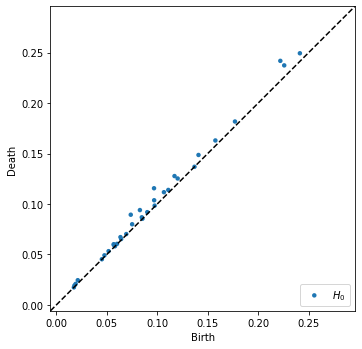

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(121)

rips.plot(diagrams_h1[0], show=False)

#plt.subplot(122)
#rips.plot(diagrams_h1[-1], show=False)
#plt.title("PD of $H_1$ for circle w/ noise")

plt.show()

In [ ]:

pim = PersImage(pixels=[20,20], spread=1)
imgs = pim.transform(diagrams_h1)

PersImage(pixels=[20, 20], spread=1, specs=None, kernel_type="gaussian", weighting_type="linear")


IndexError: ignored

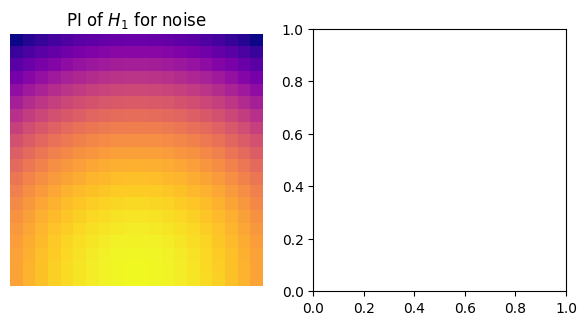

In [ ]:

plt.figure(figsize=(15,7.5))

for i in range(2):
    ax = plt.subplot(240+i+1)
    pim.show(imgs[i], ax)
    plt.title("PI of $H_1$ for noise")

In [ ]:
embeddings = []
d=3
tau=4

for idx in range(X_train.shape[0]):
  ts_max = X_train.iloc[idx].max()

  temp_embedding = TimeDelayEmbedding(dim=d, delay=tau)(X_train.iloc[idx].dropna()[0:]/ts_max)
  embeddings.append(temp_embedding)

rips = Rips(maxdim=1, coeff=2)
#diagrams = [rips.fit_transform(embedding) for embedding in embeddings[0:10]]
diagrams_h1 = [rips.fit_transform(embedding)[1] for embedding in embeddings[100:108]]

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


In [ ]:
pim = PersImage(pixels=[28,28], spread=0.5)
imgs = pim.transform(diagrams_h1)

PersImage(pixels=[28, 28], spread=0.5, specs=None, kernel_type="gaussian", weighting_type="linear")


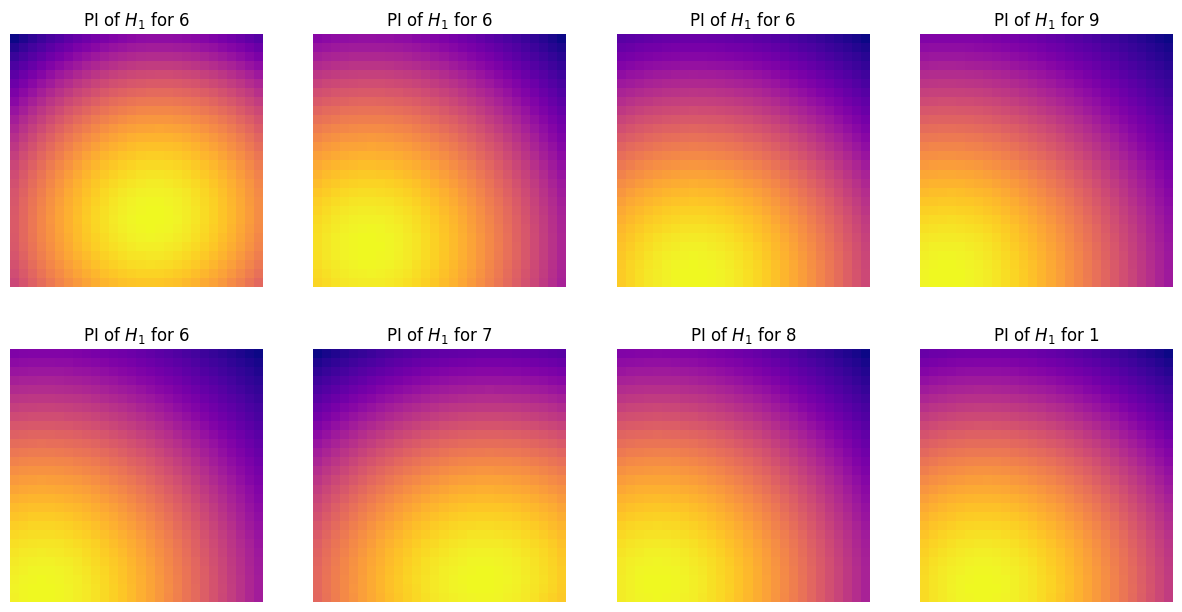

In [ ]:
plt.figure(figsize=(15,7.5))

for i in range(8):
    ax = plt.subplot(240+i+1)
    pim.show(imgs[i], ax)
    plt.title("PI of $H_1$ for {}".format(y_train.iloc[10+i]))

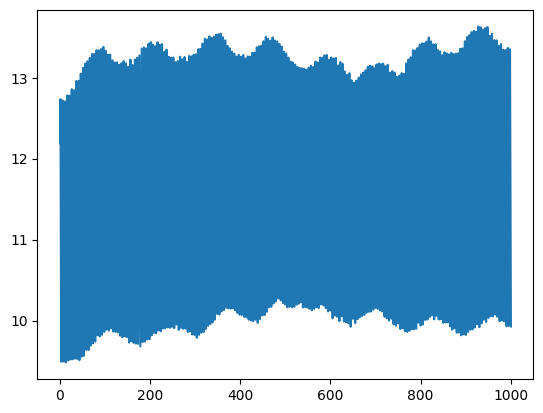

In [ ]:
plt.plot(X_train.iloc[250].dropna())

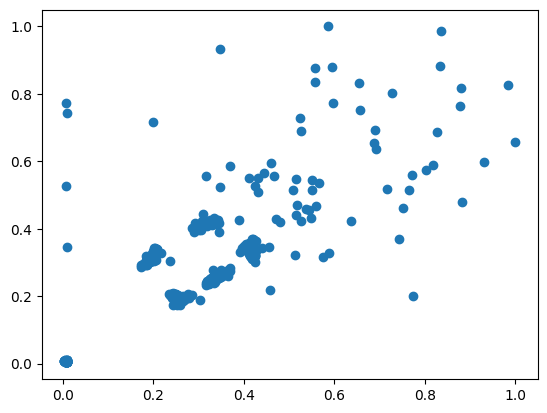

In [ ]:
embed_idx = 2
plt.scatter(embeddings[embed_idx][:,0], embeddings[embed_idx][:,1])
